<a href="https://colab.research.google.com/github/nacamacho/MedicBot/blob/main/Med_360_limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIMPIEZA DE DATOS**

# 1. Problema

En la actualidad, los chatbots ofrecidos por las Entidades Promotoras de Salud (EPS) del país están enfrentando dificultades significativas en la satisfacción del usuario debido a las quejas recurrentes sobre la calidad de las interacciones y respuestas proporcionadas por esta herramienta. La insatisfacción generalizada de los usuarios resalta la necesidad urgente de mejorar la experiencia de usuario con este tipo de tecnología en el ámbito de la atención de la salud.

Nuestro objetivo principal es abordar estas preocupaciones y mejorar la experiencia del usuario con los chatbots de las EPS. Para lograr esto, nos enfocaremos en recolectar información detallada sobre las respuestas generadas por los chatbots y en introducir nuevas interacciones que optimicen la experiencia del usuario.

¿Qué perfil tienen los usuarios con mayores dificultades en la interacción con el chatbot de su EPS?

#2. El set de datos

La información recolectada por el quipo de mercadeo se encuentra en un archivo CSV () con 30 filas y 15 columnas.

Cada registro contiene 13 características y una categoría ("si" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "Marca Temporal": Fecha y hora (duración)
2. "Nombre": Nombre (nominal)
2. "Ciudad": Lugar de residencia (categórica: "Bogotá", "Ibagué", "Medellin", "Cali", "Barranquilla", "Cartagena", "Bucaramanga", "Cúcuta","Santa Marta", "Pereira", "Manizales", "Villavicencio", "Pasto", "Neiva", "Montería", "Sincelejo", "Popayán", "Valledupar", "Armenia", "Tunja", "Ibague", "Riohacha", "Buenaventura", "Palmira", "Soledad", "Itagüí", "Floridablanca", "Girardot", "Fusagasugá", "Facativá", "Tuluá", "Envigado", "Yopal", "Barrancabermeja", "Cartago", "Quibdo", "Montería", "Leticia", "Florencia", "Puerto Asís", "Arauca", "Apartadó", "Puerto Tejada","Sogamoso", "Mosquera")
3. "Edad": Edad (Numérica)
4. "EPS": EPS pertenece (categórica: "Sanitas", "Sura", "Nueva eps", "Allianz", "Salud Total", "Compensar", "Famisanar", "Coosalud", "Coomeva", "Cruz blanca", "Cajacopi", "Capital salud", "Comfama", "Emsanar", "Mutual ser", "Savia salud", "Comfenalco", "Ambuq", "Suramericana")
5. "Aspectos a mejorar": (categórica: "Tiempo de respuesta", "Asignación de turnos", "Facilidad del interfaz")
6. "¿Ha utilizado el chatbot para agendar citas médicas?": ("Si", "no")
7. "Si ha utilizado un chatbot ¿Para qué lo ha utilizado principalmente?:(categórica:"programar una cita", "obtener información sobre una condición médica", "hacer preguntas sobre un medicamento, tratamiento y orden médica")
8. "¿Que tan satisfecho esta con la interfaz y la facilidad de uso del chatbot?": (categórica: "muy satisfecho", "más o menos satisfecho", "nada satisfecho")
9. "¿Considera que el chatbot es util para agendar citas médicas de manera eficiente?":(categórica: "Si", "tal vez", "no")
10. "¿Cada cuanto utiliza eel chatbot, para generar una cita médica?":(categórica: "una vez por semana", "una vez al año", "no lo utilizo para este fin")
11. "¿Ha experimentado algún problema o dificultad al interactual con el chatbot?":(categórica: "Si", "no")
12. "¿Que problemas ha experimentado": (categórica: "Limitaciones en la capacidad de respuesta en tiempo real", "Incapacidad para entender consultas complejas", "Interacciones impersonales y falta de empatía")
13. "¿Que tiempo tarde el chatbot en contestar la pregunta expuesta por usted?": (numerica)
14. "¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?": (categórica: "Si", "no")

#3. Una primera mirada al dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Entrega_No.2_Big_Data/Encuesta_Med_360.csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

In [ ]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Marca temporal                                                                                 30 non-null     object
 1   Nombre                                                                                         30 non-null     object
 2   Ciudad                                                                                         30 non-null     object
 3   Edad                                                                                           30 non-null     object
 4   Que EPS pertenece                                                                              30 non-null     object
 5   ¿Qué aspectos mejoraría de los 

#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Importante verificar que los datos estén completos (las columnas tienen la misma cantidad de registros) El número total de registros debería ser 30. Si los datos no son relevantes (mínima cantidad de faltantes) en el conjunto de datos optaremos por eliminar las filas correspondientes.

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Marca temporal                                                                                 30 non-null     object
 1   Nombre                                                                                         30 non-null     object
 2   Ciudad                                                                                         30 non-null     object
 3   Edad                                                                                           30 non-null     object
 4   Que EPS pertenece                                                                              30 non-null     object
 5   ¿Qué aspectos mejoraría de los 

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del usuario (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "EPS" solo tuviésemos el nivel "Unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 20.
- **Columnas con información redundante**. Por ejemplo si además de la columna "Marca Temporal" tuviésemos la columna "Mes" y "día", resultado de separar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla. En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas#
cols_cat = ['Ciudad','Edad','Que EPS pertenece' ,'¿Qué aspectos mejoraría de los chatbot?','Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?','Ha utilizado el chatbot para agendar citas médicas','Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?',' ¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?','¿Cada cuanto  utiliza el chat bot, para generar una cita médica?'
,'¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?','¿Qué problemas ha experimentado?','¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?','¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')


Columna Ciudad: 11 subniveles
Columna Edad: 3 subniveles
Columna Que EPS pertenece: 16 subniveles
Columna ¿Qué aspectos mejoraría de los chatbot?: 3 subniveles
Columna Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?: 3 subniveles
Columna Ha utilizado el chatbot para agendar citas médicas: 2 subniveles
Columna Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?: 3 subniveles
Columna  ¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?: 3 subniveles
Columna ¿Cada cuanto  utiliza el chat bot, para generar una cita médica?: 3 subniveles
Columna ¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?: 2 subniveles
Columna ¿Qué problemas ha experimentado?: 3 subniveles
Columna ¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?: 3 subniveles
Columna ¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [ ]:
data.describe()

,Marca temporal,Nombre,Ciudad,Edad,Que EPS pertenece,¿Qué aspectos mejoraría de los chatbot?,"Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?",Ha utilizado el chatbot para agendar citas médicas,Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?,¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?,"¿Cada cuanto utiliza el chat bot, para generar una cita médica?",¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?,¿Qué problemas ha experimentado?,¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?,¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?
count,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
unique,30,30,11,3,16,3,3,2,3,3,3,2,3,3,2
top,22/04/2024 2:57:24,Daniel Sanchez,Bogotá,18 a 21 años,Sanitas,Tiempo de respuesta,Programar una cita,Si,Más o menos satisfecho,Sí,Una vez al año,Si,Limitaciones en la capacidad de respuesta en t...,de un 1 minuto a 3 minutos,Si
freq,1,1,14,15,6,11,25,27,22,16,24,21,13,14,23


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (30, 15)
Tamaño del set después de eliminar las filas repetidas: (30, 15)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

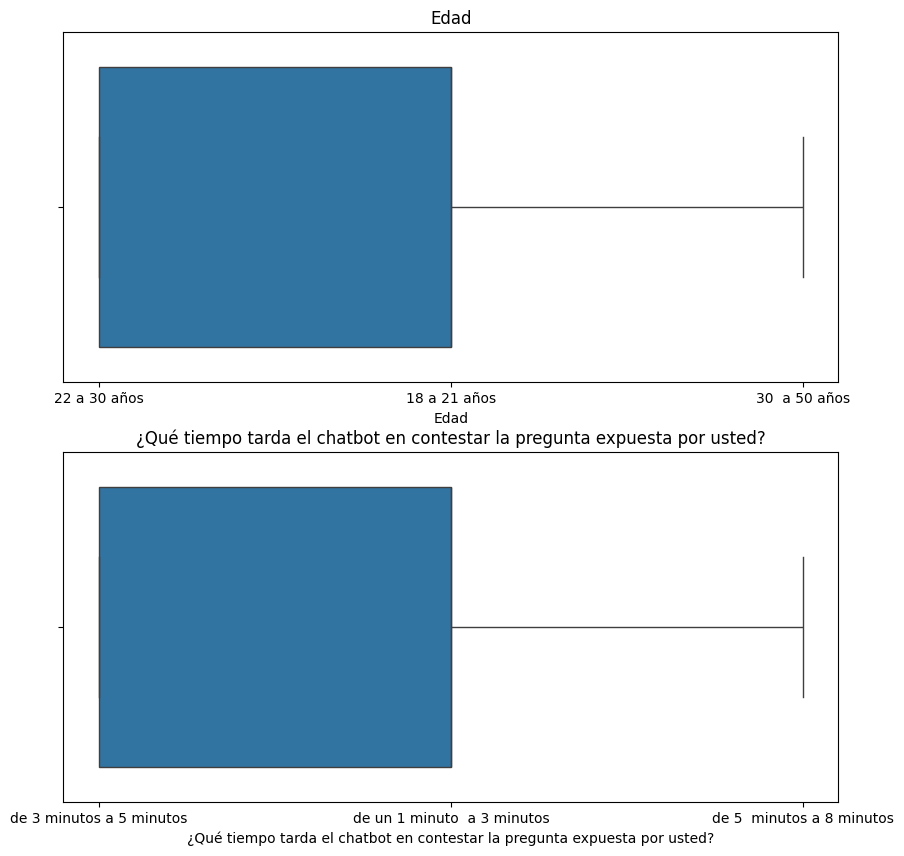

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = cols_cat = ['Edad','¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
fig.subplots_adjust(hspace=0.2)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
# Eliminar filas con "edad">30 a 50 años
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['Edad']<="30 a 50 años"]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (30, 15)
Tamaño del set después de eliminar registros de edad: (30, 15)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

<ipython-input-64-c86bfea635dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)
<ipython-input-64-c86bfea635dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)
<ipython-input-64-c86bfea635dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)
<ipython-input-64-c86bfea635dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)
<ipython-input-64-c86bfea635dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)
<ipython-input-64-c86bfea635dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_x

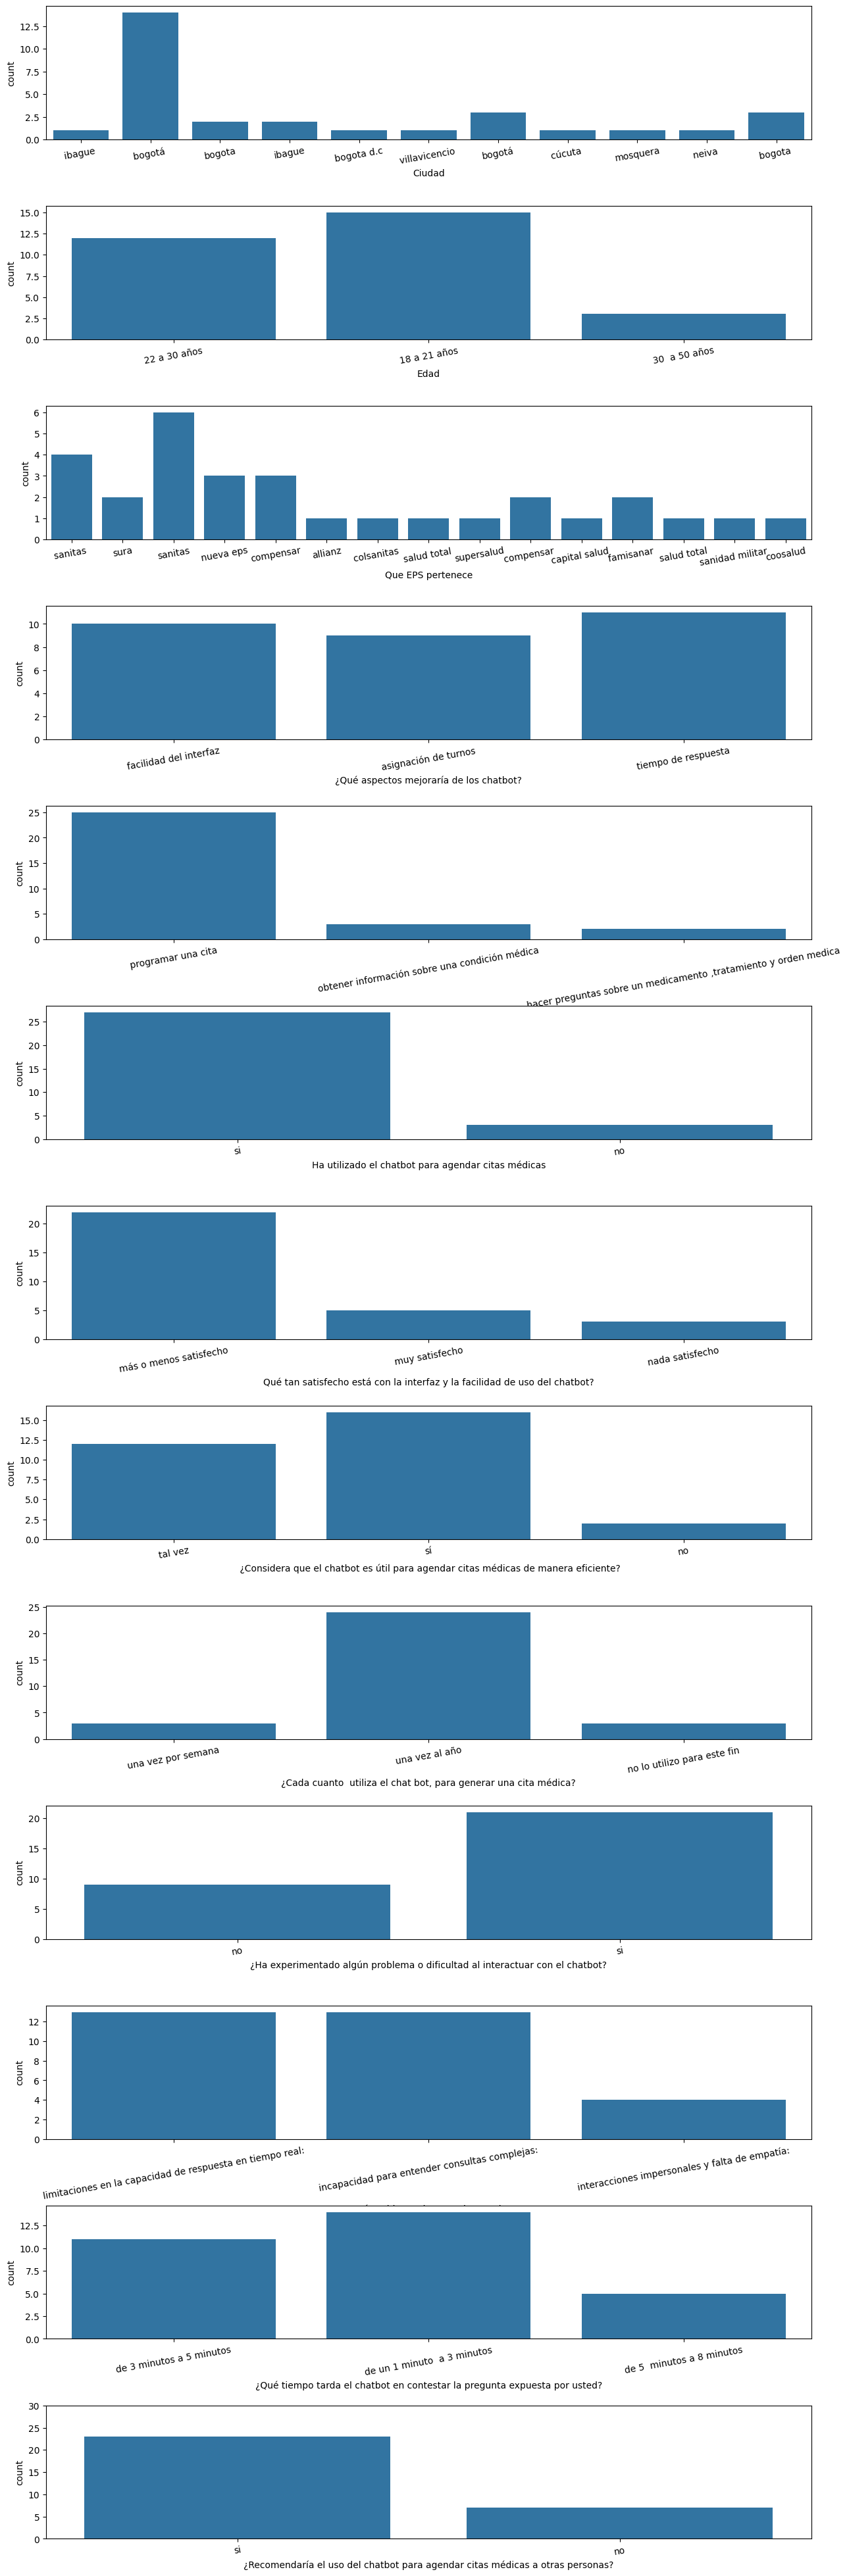

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['Ciudad','Edad','Que EPS pertenece','¿Qué aspectos mejoraría de los chatbot?','Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?','Ha utilizado el chatbot para agendar citas médicas','Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?',' ¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?','¿Cada cuanto  utiliza el chat bot, para generar una cita médica?','¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?','¿Qué problemas ha experimentado?','¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?','¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?']
fig, ax = plt.subplots(nrows=13,figsize=(15,50))
plt.ylim(0,30)
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)


In [ ]:
data.shape

(30, 15)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

El set de datos ya está listo para el Análisis Exploratorio.

In [ ]:
ruta = "/gdrive/MyDrive/Entrega_No.2_Big_Data/Encuesta_Med_360.csv"
data.to_csv(ruta, index=False)